## Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Cost function

### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

# Make Data

In [3]:
x_1 = np.linspace(start = -3, stop=3, num=500)

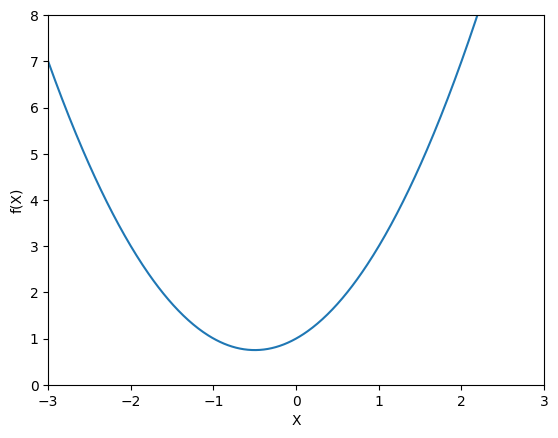

In [4]:
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1))

In [5]:
def df(x):
   return 2*x+1

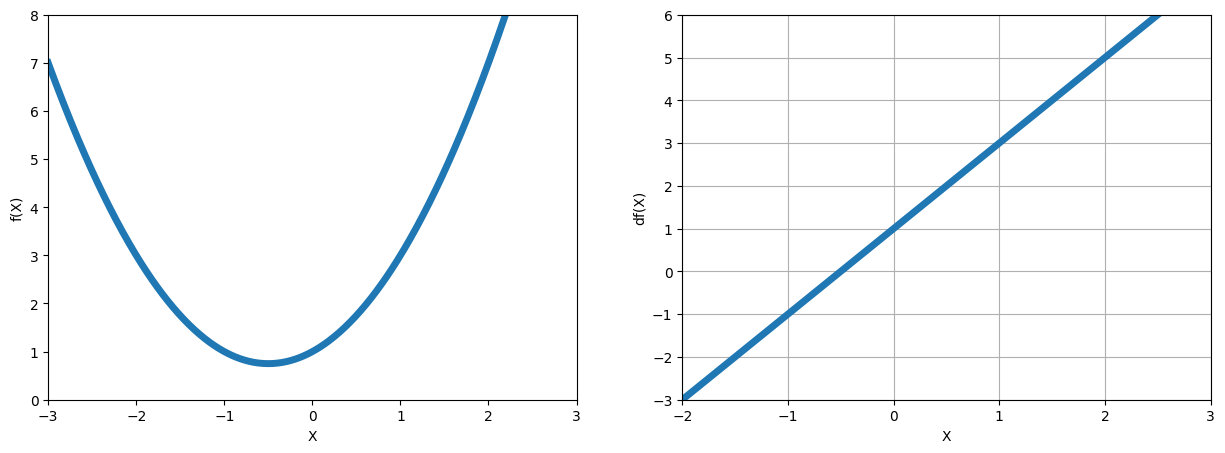

In [6]:
plt.figure(figsize= [15,5])
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1), linewidth=5)

plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.xlabel('X')
plt.grid()
plt.ylabel('df(X)')
plt.plot(x_1, df(x_1), linewidth=5)

## Python Loops & Gradient Descent

In [7]:
for n in range(5):
    print("Hello World")
print("End of loop")


Hello World
Hello World
Hello World
Hello World
Hello World
End of loop


In [8]:
counter  = 0
while counter < 7:
    print('Counting ...', counter)
    counter += 1
print("Ready or not, here I came")

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I came


In [9]:
new_x = -3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(5000):
    previous_x = new_x
    gradient = df(previous_x) #steepness tells how far to bottom , # slope being very very high indicates being far from the minimum value
    new_x = previous_x - step_multiplier * gradient

    x_list.append(new_x)
    slope_list.append(df(new_x))

    step_size = abs(new_x - previous_x)
    #print(step_size)
    if step_size < precision:
        print(n)
        break

    

print('Local Minimum occurs at', new_x)
print('Slope or df(x) at this point is ', df(new_x))
print('f(x) value or cost at this point is ', f(new_x))


49
Local Minimum occurs at -0.5000356811923176
Slope or df(x) at this point is  -7.136238463512079e-05
f(x) value or cost at this point is  0.7500000012731475


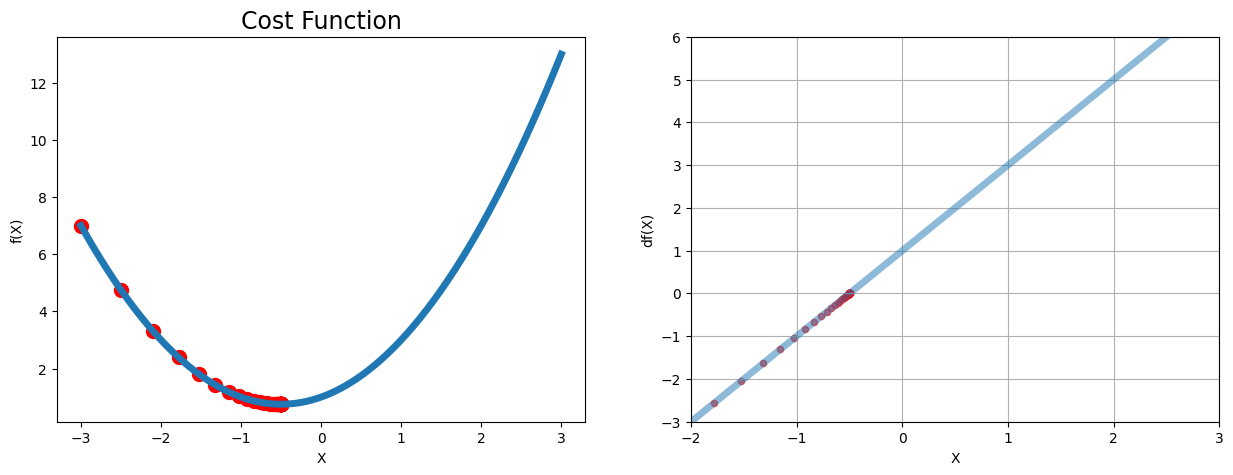

In [10]:
from turtle import color


plt.figure(figsize= [15,5])

#cost functions
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X')
plt.ylabel('f(X)')

plt.plot(x_1, f(x_1), linewidth=5)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100)


# plot 2
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.xlabel('X')
plt.grid()
plt.ylabel('df(X)')
plt.plot(x_1, df(x_1), linewidth=5, alpha=0.5)

plt.scatter(x_list, slope_list, color ="red", s=20, alpha=0.6)